<a href="https://colab.research.google.com/github/JinyuanSun/my_bio_script/blob/main/genomic/genomic_bioinfo_plot_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CAZy annotation

## Cazy

In [91]:
#@title


import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct


def cazy_plot(cazy_values, short_cazy_names = False, size = 0.3, dark = False):
    if short_cazy_names == False:
        cazy_names = ["Glycoside Hydrolases",
                      "Glycosyltransferases",
                      "Polysaccharide Lyases",
                      "Carbohydrate Esterases",
                      "Auxiliary Activities",
                      "Carbohydrate Binding Modules"]
    else:
        cazy_names = ["GHs",
                      "GTs",
                      "PLs",
                      "CEs",
                      "AAs",
                      "CBMs"]

    if dark == True:
        cmap = plt.get_cmap("tab10")
        colors = cmap(np.arange(6))
    if dark == False:
        cmap = plt.get_cmap("Set3")
        colors = cmap(np.arange(6))

    #Uncomment the next line and change to any colors you like to use!
    #colors = [] 

    fig, ax = plt.subplots()
    matplotlib.style.use('ggplot')
    

    ax.pie(cazy_values, 
          labels=cazy_names, 
          radius=1, 
          colors=colors, 
          autopct = make_autopct(cazy_values),
          wedgeprops=dict(width=size, edgecolor='w'))   
  
    ax.set(aspect="equal", title='CAZy annotation')
    plt.show()
    fig.savefig('cazy_pie.png',dpi=300)


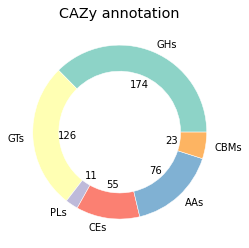

In [92]:
cazy_values = [174,126,11,55,76,23]
cazy_plot(cazy_values,short_cazy_names=True)

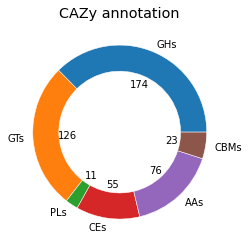

In [93]:
cazy_plot(cazy_values,short_cazy_names=True, dark=True)

## Merops

In [48]:
#@title
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct




def merops_plot(merops_dict, short_merops_names = True, size = 0.3, dark = False):
    #Aspartic (A), Cysteine (C), Glutamic (G), Metallo (M), Asparagine (N), Mixed (P), Serine (S), Threonine (T), Unknown (U)
    merops_values = merops_dict.values()
    merops_names = merops_dict.keys()
    #Uncomment the next line and change to any colors you like to use!
    #colors = [] 
    name_dict = {"A":"Aspartic",
                 "C":"Cysteine",
                 "G":"Glutamic", 
                 "M":"Metallo",
                 "N":"Asparagine",
                 "P":"Mixed",
                 "S":"Serine",
                 "T":"Threonine",
                 "U":"Unknown",
                 "I":"Inhibitor"}

    if short_merops_names == False:
        tmp = []
        for name in merops_names:
            tmp.append(name_dict[name])
        merops_names = tmp
    #plt.set_cmap("ocean") 
    fig, ax = plt.subplots()
    matplotlib.style.use('ggplot')
    
    cmap = plt.get_cmap("Set3")
    colors = cmap(np.arange(len(merops_values)))

    if dark == True:
        cmap = plt.get_cmap("tab10")
        colors = cmap(np.arange(len(merops_values)))
    #print(len(list(cmap)))
    

    ax.pie(merops_values, 
          labels=merops_names, 
          radius=1, 
          colors = colors,
          autopct = make_autopct(merops_values),
          wedgeprops=dict(width=size, edgecolor='w'))   
  
    ax.set(aspect="equal", title='merops annotation')
    plt.show()
    fig.savefig('merops_pie.png',dpi=300)


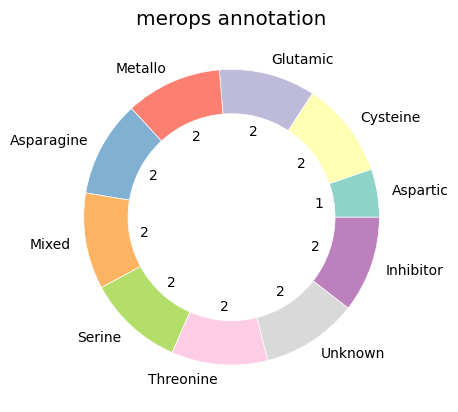

In [49]:
merops_dict = {"A":1,"C":2,"G":2, "M":2,"N":2,"P":2,"S":2,"T":2,"U":2,"I":2}
merops_plot(merops_dict, short_merops_names = False)

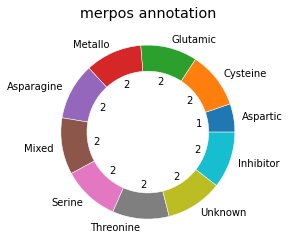

In [96]:
merpos_plot(merpos_dict, short_merpos_names = False,dark=True)

## PHI bar

In [25]:
#@title

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct



def phi_plot(phi_dict, short_phi_names = True,  dark = False):
    #chemistry_target:_resistance_to_chemical, chemistry_target:_sensitivity_to_chemical,
    #effector_(plant_avirulence_determinant), enhanced_antagonism, lethal
    # reduced_virulence, increased_virulence_(hypervirulence),
    # loss_of_pathogenicity, unaffected_pathogenicity
    phi_values = phi_dict.values()
    phi_names = phi_dict.keys()

    name_dict = {"RC":"chemistry target: resistance to chemical",
                 "SC":"chemistry target: sensitivity to chemical",
                 "EF":"effector (plant avirulence determinant)", 
                 "EA":"enhanced antagonism",
                 "LL":"lethal",
                 "RV":"reduced virulence",
                 "IV":"increased virulence",
                 "LP":"loss of pathogenicity",
                 "UP":"unaffected pathogenicity"}

    if short_phi_names == False:
        tmp = []
        for name in phi_names:
            tmp.append(name_dict[name])
        phi_names = tmp

    matplotlib.style.use('default')
    cmap = plt.get_cmap("Set3")
    colors = cmap(np.arange(len(phi_values)))

    if dark == True:
        cmap = plt.get_cmap("tab10")
        colors = cmap(np.arange(len(phi_values)))
    
    #Uncomment the next line and change to any colors you like to use!
    #colors = []     

    width = 0.7       # the width of the bars

    #fig, ax = plt.subplots()
    fig, ax = plt.subplots(figsize=(7.5,4.7))
    rects1 = ax.bar(phi_names, phi_values, width, color=colors)

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Counts')
    ax.set_title('PHI annotation')
    ax.set_xticklabels(phi_names)


    labels = ["RC: chemistry target: resistance to chemical",
                 "SC: chemistry target: sensitivity to chemical",
                 "EF: effector (plant avirulence determinant)", 
                 "EA: enhanced antagonism",
                 "LL: lethal",
                 "RV: reduced virulence",
                 "IV: increased virulence",
                 "LP: loss of pathogenicity",
                 "UP: unaffected pathogenicity"]

    handles = [rect for rect in rects1]
    #print([rect for rect in rects1])
    plt.legend(handles,
               labels,
               bbox_to_anchor =(1.02, -0.1),
               ncol = 2)
    #plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)


    def autolabel(rects):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2.,height,
                    '%d' % int(height),
                    ha='center', va='bottom')

    autolabel(rects1)

    #plt.set(aspect="equal", title='PHI annotation')
    plt.show()
    fig.savefig('phi_bar.png',dpi=300)


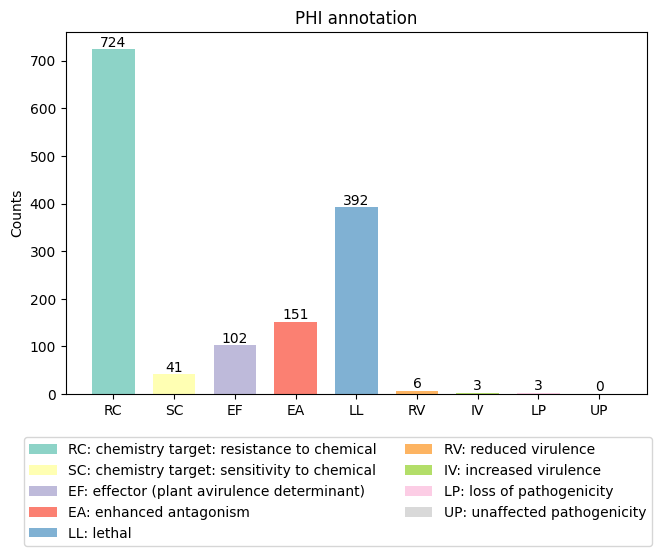

In [101]:
phi_dict = {"RC":724,"SC":41,"EF":102,"EA":151,"LL":392,"RV":6,"IV":3,"LP":3,"UP":0}
phi_plot(phi_dict, short_phi_names = True,  dark = False)

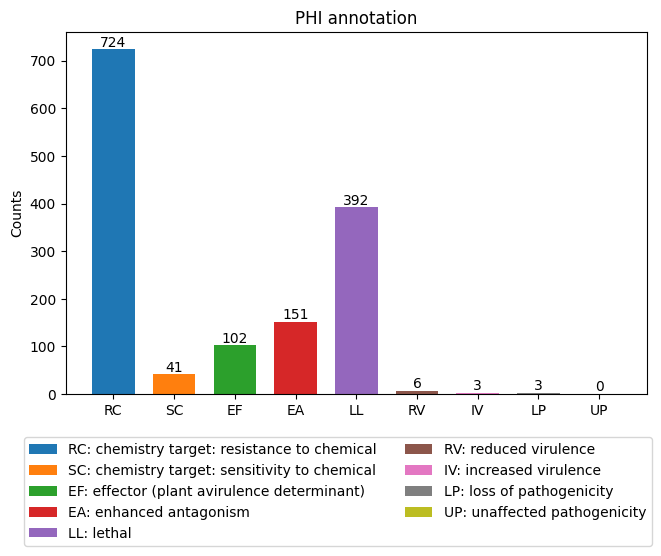

In [102]:
phi_plot(phi_dict, short_phi_names = True,  dark = True)

## Venn (P450, Phi, CAZy, merpos)

In [11]:
%matplotlib inline

def venn_plot(dataset_dict):
    from venn import venn
    import matplotlib.pyplot as plt

    fig = venn(dataset_dict,cmap = plt.get_cmap("RdYlBu"))
    plt.show()
    fig.figure.savefig('venn.png',dpi=300)

In [7]:
%%bash
pip install venn
git clone https://github.com/JinyuanSun/my_bio_script.git

Cloning into 'my_bio_script'...


In [12]:
def read_glist(path = './'):

    import os

    dataset_dict = {}

    for filename in os.listdir(path):
        if filename.endswith(".glist"): 
            filepath = os.path.join(path, filename)
            with open(filepath) as glist:
                k = filename.replace(".glist","")
                dataset_dict[k] = []
                for line in  glist:
                    gene = line.strip()
                    dataset_dict[k].append(gene)
                dataset_dict[k] = set(dataset_dict[k])
                glist.close()


         # print(os.path.join(directory, filename))
        else:
            continue
    return dataset_dict





In [13]:
dataset_dict = read_glist(path = "my_bio_script/genomic/test")

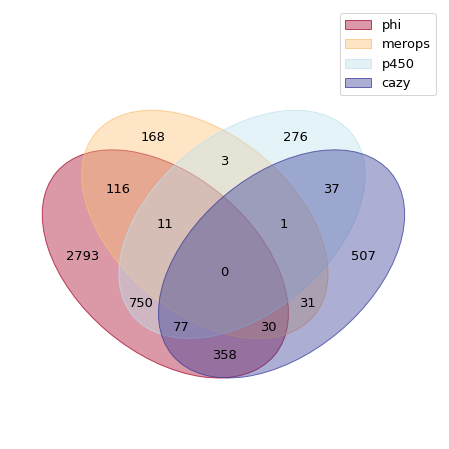

In [14]:
venn_plot(dataset_dict)

In [ ]:
%%bash

grep -v "#" protein.faa.p450.htb|awk -F " " '{print$3}'|sort|uniq > p450.glist
grep -v "#" protein.faa.cazy.htb|awk -F " " '{print$3}'|sort|uniq > cazy.glist
awk '{print$1}' protein.faa.merops.btb |sort|uniq > merops.glist
awk '{print$1}' protein.faa.phi.btb |sort|uniq > phi.glist


In [33]:
def make_phi_dict(btbfile = 'protein.faa.phi.btb'):
    phi_dict =  {"RC":0,
                 "SC":0,
                 "EF":0,
                 "EA":0,
                 "LL":0,
                 "RV":0,
                 "IV":0,
                 "LP":0,
                 "UP":0}

    map_dict = { "chemistry target: resistance to chemical":"RC",
                 "chemistry target: sensitivity to chemical":"SC",
                 "effector (plant avirulence determinant)":"EF",
                 "enhanced antagonism":"EA",
                 "lethal":"LL",
                 "reduced virulence":"RV",
                 "increased virulence (hypervirulence)":"IV",
                 "loss of pathogenicity":"LP",
                 "unaffected pathogenicity":"UP"}

    with open(btbfile) as btbfile:
        gene_name = ''
        annotation_dict = {}
        for line in btbfile:
            line_list = line.split("\t")
            annotation = line_list[1].split("#")[-1].split("__")
            if gene_name == line_list[0]:
                annotation_dict[gene_name] += annotation
            else:
                gene_name = line_list[0]
                annotation_dict[gene_name] = annotation
        btbfile.close()
    
    for gene_name in annotation_dict:
        for annotation in set(annotation_dict[gene_name]):
            phi_dict[map_dict[annotation.replace("_"," ")]] += 1
    
    return phi_dict

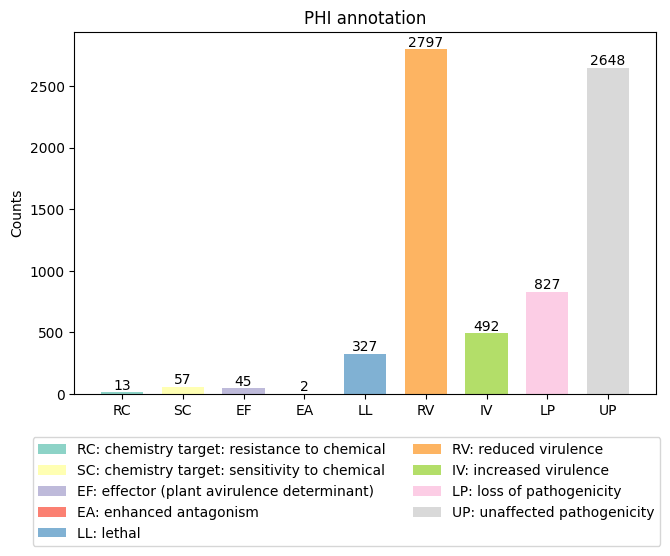

In [34]:
phi_dict = make_phi_dict(btbfile = 'my_bio_script/genomic/test/protein.faa.phi.btb')
phi_plot(phi_dict, short_phi_names = True,  dark = False)

In [60]:
def read_merops_map(merops_path = "./merops.txt"):
    merops_map_dict = {}
    with open(merops_path) as merops_txt:
        for line in merops_txt:
            merops_gene = line[1:11]
            merops_class = line.split("#")[1][0]
            merops_map_dict[merops_gene] = merops_class
        merops_txt.close()
    return merops_map_dict

def mk_merops_dict(merops_map_dict, btbfile = './protein.faa.merops.btb'):
    merops_dict = {"A":0,"C":0,"G":0, "M":0,"N":0,"P":0,"S":0,"T":0,"U":0,"I":0}

    name_dict = {"A":"Aspartic",
                 "C":"Cysteine",
                 "G":"Glutamic", 
                 "M":"Metallo",
                 "N":"Asparagine",
                 "P":"Mixed",
                 "S":"Serine",
                 "T":"Threonine",
                 "U":"Unknown",
                 "I":"Inhibitor"}

    with open(btbfile) as btbfile:
        gene_name = ''
        annotation_dict = {}
        for line in btbfile:
            line_list = line.split("\t")
            annotation = merops_map_dict[line_list[1]]
            if gene_name == line_list[0]:
                annotation_dict[gene_name].append(annotation)
            else:
                gene_name = line_list[0]
                annotation_dict[gene_name] = [annotation]
        btbfile.close()
    
    for gene_name in annotation_dict:
        for annotation in set(annotation_dict[gene_name]):
            merops_dict[annotation] += 1

    occured_merops = {}
    absent_list = []

    for key in merops_dict:
        if merops_dict[key] > 0:
            occured_merops[key] = merops_dict[key]
        else:
            absent_list.append(key + "(" + name_dict[key] + ")")
    
    print("Lack of "+", ".join(absent_list)+" in the genome!")

    return occured_merops



In [61]:
merops_map_dict = read_merops_map(merops_path = "my_bio_script/genomic/test/merops.txt")
merops_dict = mk_merops_dict(merops_map_dict, btbfile = 'my_bio_script/genomic/test/protein.faa.merpos.btb')

Lack of N(Asparagine), U(Unknown) in the genome!


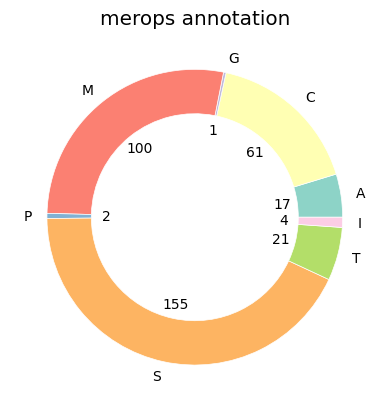

In [62]:
merops_plot(merops_dict, short_merops_names = True)